## DOWNSTREAM SIGNALING DYNAMICS

## PCA

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Set plotting format
matplotlib.rcParams['font.sans-serif'] = "Arial"
sns.set(style="whitegrid", font_scale=1, color_codes=True, palette="colorblind", rc={"grid.linestyle": "dotted", "axes.linewidth": 0.6})

In [ ]:
# def plotPCA(ax, d, n_components, scores_ind, loadings_ind, hue_scores=None, style_scores=None, size_dots=100, pvals=None, style_load=None, legendOut=False, quadrants=True):
#     """ Plot PCA scores and loadings. """
#     pp = NMF(n_components=n_components)
#     dScor_ = pp.fit_transform(d.select_dtypes(include=["float64"]))
#     dLoad_ = pp.components_
#     dScor_, dLoad_ = pca_dfs(dScor_, dLoad_, d, n_components, scores_ind, loadings_ind)
#     # varExp = np.round(pp.explained_variance_ratio_, 2)

#     # Scores
#     sns.scatterplot(x="PC1", y="PC2", data=dScor_, hue=hue_scores, style=style_scores, ax=ax[0], **{"linewidth": 0.5, "edgecolor": "k"}, s=size_dots)
#     ax[0].set_title("PCA Scores")
#     # ax[0].set_xlabel("PC1 (" + str(int(varExp[0] * 100)) + "%)", fontsize=10)
#     # ax[0].set_ylabel("PC2 (" + str(int(varExp[1] * 100)) + "%)", fontsize=10)
#     ax[0].legend(prop={'size': 8})
#     if legendOut:
#         ax[0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, labelspacing=0.2, prop={'size': 8})

#     # Loadings
#     if isinstance(pvals, np.ndarray):
#         dLoad_["p-value"] = pvals
#         sns.scatterplot(x="PC1", y="PC2", data=dLoad_, hue="p-value", style=style_load, ax=ax[1], **{"linewidth": 0.5, "edgecolor": "k"}, s=100)
#     else:
#         sns.scatterplot(x="PC1", y="PC2", data=dLoad_, style=style_load, ax=ax[1], **{"linewidth": 0.5, "edgecolor": "k"}, s=100)

#     ax[1].set_title("PCA Loadings")
#     # ax[1].set_xlabel("PC1 (" + str(int(varExp[0] * 100)) + "%)", fontsize=10)
#     # ax[1].set_ylabel("PC2 (" + str(int(varExp[1] * 100)) + "%)", fontsize=10)
#     ax[1].legend(prop={'size': 8})
#     for j, txt in enumerate(dLoad_[loadings_ind]):
#         ax[1].annotate(txt, (dLoad_["PC1"][j] + 0.001, dLoad_["PC2"][j] + 0.001), fontsize=10)

#     if quadrants:
#         ax[0].axhline(0, ls='--', color='lightgrey')
#         ax[0].axvline(0, ls='--', color='lightgrey')
#         ax[1].axhline(0, ls='--', color='lightgrey')
#         ax[1].axvline(0, ls='--', color='lightgrey')

In [ ]:
# ts = pd.read_csv("msresist/data/Validations/Luminex/AXLm_TimeSeries_Downstream.csv")
# ts["Time point"] = ts["Time point"].replace(0, 20)
# ts["Time point"] = ts["Time point"].replace(5, 50)
# ts["Time point"] = ts["Time point"].replace(10, 100)
# ts["Time point"] = ts["Time point"].replace(30, 150)
# ts["Time point"] = ts["Time point"].replace(60, 250)
# ts["Time point"] = ts["Time point"].replace(120, 350)
# ts["Time point"] = ts["Time point"].replace(240, 450)

# ts = ts.set_index("Cell Line")
# for cl, idx in list(zip(ts.index.values, np.arange(ts.shape[0]))):
#     ts.iloc[idx, 2:] /= ts.loc[cl].iloc[0, 2:]
# ts = ts.reset_index()

In [ ]:
# ts = ts.reset_index().set_index("Treatment").drop("UT").reset_index()
# ts.iloc[:, 3:] = StandardScaler(with_std=False).fit_transform(ts.iloc[:, 3:])

In [ ]:
# _, ax = plt.subplots(1, 2, figsize=(15, 7))
# plotPCA(ax, ts, 2, ["Cell Line", "Treatment"], ts.columns[3:], hue_scores="Cell Line", style_scores="Treatment", size_dots=list(ts["Time point"]))

## TENSOR DECOMPOSITION

In [4]:
ts = pd.read_csv("msresist/data/Validations/Luminex/AXLm_TimeSeries_Downstream.csv")
a = ts[(ts["Treatment"] == "UT") | (ts["Treatment"] == "A")].iloc[:, 3:].values.reshape((10, 7, 8))
ae = ts[(ts["Treatment"] == "UT") | (ts["Treatment"] == "AE")].iloc[:, 3:].values.reshape((10, 7, 8))
out = np.array([a, ae])
print(out.shape)

(2, 10, 7, 8)


In [22]:
from tensorly.decomposition import parafac
import tensorly as tl

fac = parafac(out, 2, tol=1e-9, n_iter_max=1000)
fac = tl.cp_tensor.cp_flip_sign(fac)

In [23]:
# data variance
dvar = np.sum(np.square(out))
diffvar = np.sum(np.square(out - tl.cp_to_tensor(fac)))

# R2X
print(1.0 - diffvar / dvar)

0.9267995139310127


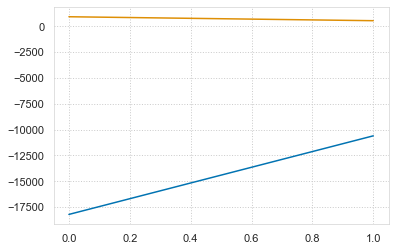

In [28]:
# First mode factors
plt.plot(fac.factors[0]);

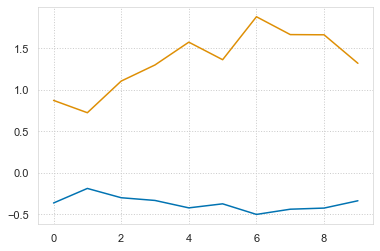

In [27]:
# Second mode factors
plt.plot(fac.factors[1]);

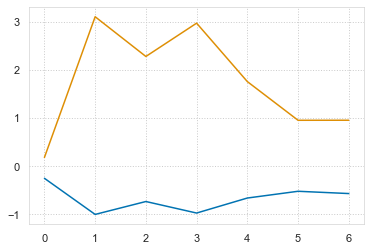

In [29]:
# Third mode factors
plt.plot(fac.factors[2]);